In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\Mi Notebook\Ironhack\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv")

In [2]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


#### 1. Show the dataframe shape.

In [3]:
df.shape

(10910, 26)

#### 2. Standardize header names.

In [4]:
# the initial look of the columns
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
columns = []
for i in range (len(df.columns)):
    columns.append(df.columns[i].lower().replace(" ", "_"))
columns

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [6]:
df.columns = columns #we replace the original column names with the standarized ones
df.head()            #justo check the column names

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### 3.Which columns are numerical?

In [8]:
df.dtypes # in general the columns have the following types:

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [9]:
num_df = df._get_numeric_data() #  to specifically get the numeric ones:
num_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


#### 4. Which columns are categorical?

In [10]:
cols = df.columns
num_cols = num_df.columns
cat_df = list(set(cols) - set(num_df))
cat_df

['state',
 'gender',
 'renew_offer_type',
 'customer',
 'vehicle_class',
 'education',
 'marital_status',
 'vehicle_size',
 'response',
 'effective_to_date',
 'policy_type',
 'coverage',
 'employmentstatus',
 'sales_channel',
 'location_code',
 'policy',
 'vehicle_type']

#### 5. Check and deal with NaN values.

In [11]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [12]:
round(df.isna().sum()/len(df),4)*100

customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type                     50.25
dtype: float64

###### the column with the biggest amount of null values is vehicle_type 50.25%. But I personally think its not enough to be dropped. So We just keep the columns without dropping any column. I would suggest just to ignore those values.

#### 6. Datetime format - Extract the months from the dataset and store in a separate column. 

In [13]:
df['month'] = pd.DatetimeIndex(df['effective_to_date']).month

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


#### Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [14]:
first_q = df[df['month'] < 3 ]  
first_q

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [15]:
df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Lab | Customer Analysis Round 3

#### 1. Show DataFrame info.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

#### 2. Describe DataFrame.

In [17]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### 3. Show a plot of the total number of responses.

<AxesSubplot:>

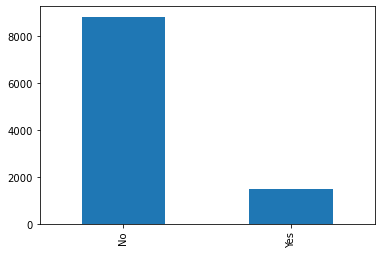

In [18]:
total_response = df['response'].value_counts()

total_response.plot.bar()

#### 4. Show a plot of the response rate by the sales channel.

In [19]:
c_r = df.groupby(["sales_channel"]).count().reset_index()
c_r

,sales_channel,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Agent,4121,3890,4121,3890,4121,4121,4121,4121,4121,4121,4121,4121,4121,3887,4121,3887,4121,4121,4121,4121,4121,3903,3903,2057
1,Branch,3022,2865,3022,2865,3022,3022,3022,3022,3022,3022,3022,3022,3022,2871,3022,2871,3022,3022,3022,3022,3022,2847,2847,1485
2,Call Center,2141,2013,2141,2013,2141,2141,2141,2141,2141,2141,2141,2141,2141,1998,2141,1998,2141,2141,2141,2141,2141,2017,2017,1071
3,Web,1626,1511,1626,1511,1626,1626,1626,1626,1626,1626,1626,1626,1626,1521,1626,1521,1626,1626,1626,1626,1626,1521,1521,815


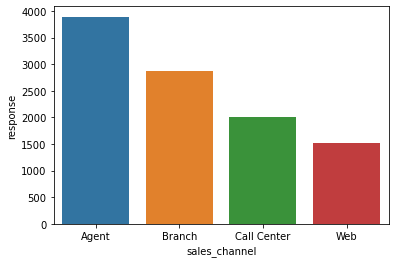

In [20]:
sns.barplot (x="sales_channel", y="response", data = c_r)
plt.show()

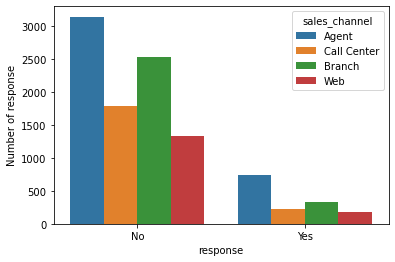

In [21]:
sns.countplot(x = 'response', hue ='sales_channel', data = df)
plt.ylabel('Number of response')
plt.show()

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

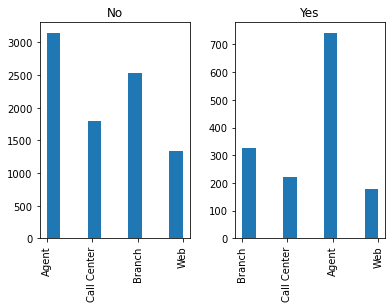

In [22]:
df.hist(by='response', column='sales_channel')

#### 5. Show a plot of the response rate by the total claim amount.

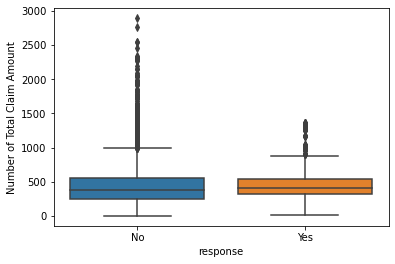

In [23]:
sns.boxplot(x = 'response', y ='total_claim_amount', data = df)
plt.ylabel('Number of Total Claim Amount')
plt.show()

#### 6. Show a plot of the response rate by income.

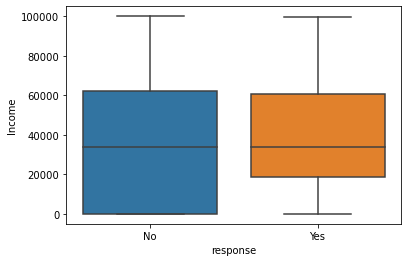

In [24]:
sns.boxplot(x = 'response', y ='income', data = df)
plt.ylabel('Income')
plt.show()

## Lab | Customer Analysis Round 4

#### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [25]:
# Check the data types of the columns.
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [26]:
# the numeric data into dataframe called numerical
numerical = df.select_dtypes(include=np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [27]:
# the categorical columns in a dataframe called categoricals
categorical = df.select_dtypes(include=np.object)
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


#### 2. Use seaborn library to construct distribution plots for the numerical variables

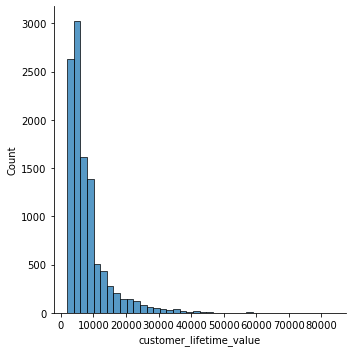

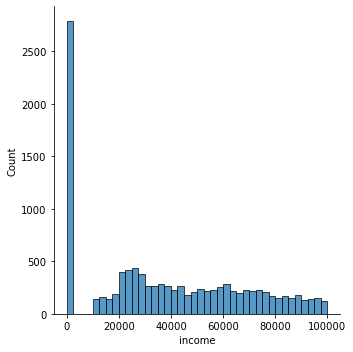

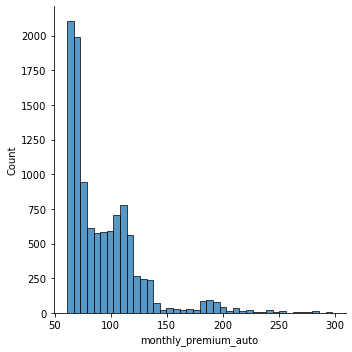

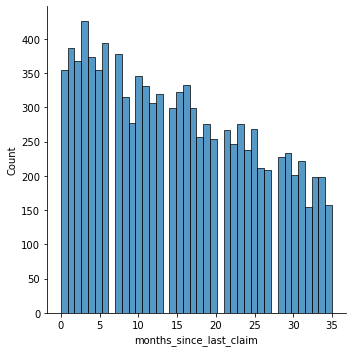

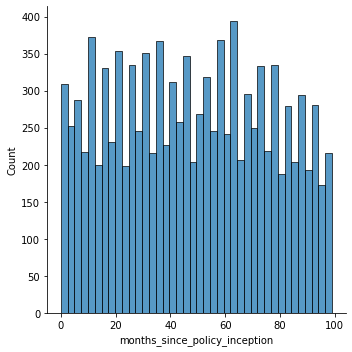

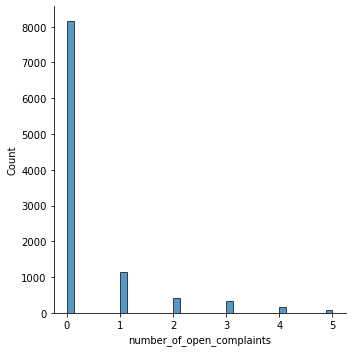

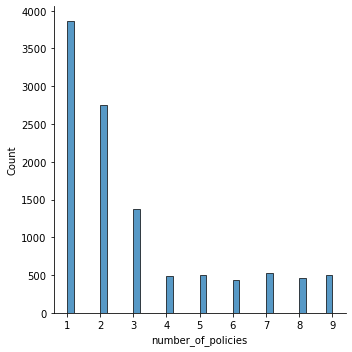

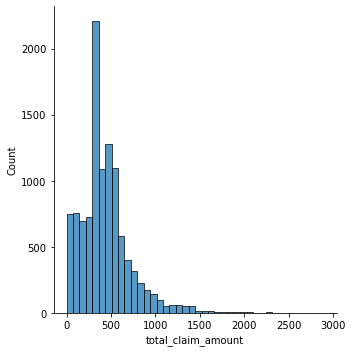

In [28]:
for i in range(numerical.shape[1]):
    sns.displot(numerical[numerical.columns[i]], bins = 40)
    plt.show()

#### 3. Use Matplotlib to construct histograms

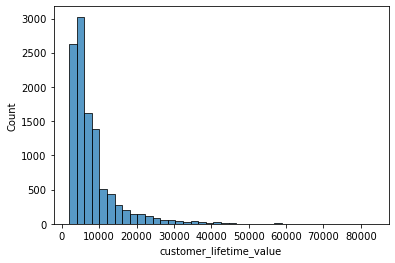

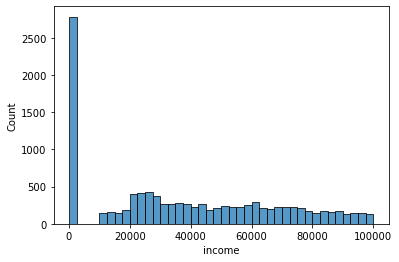

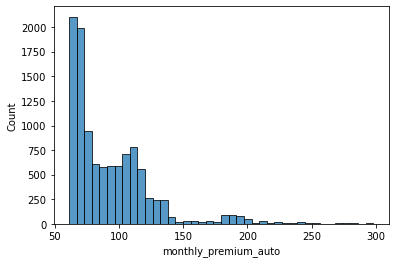

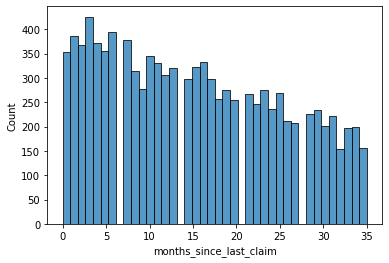

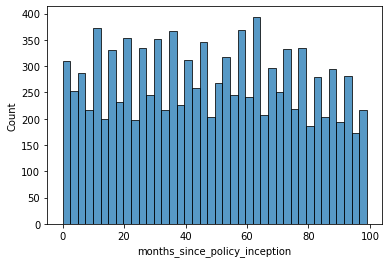

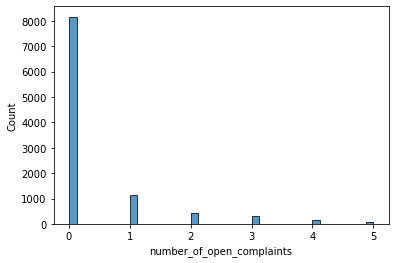

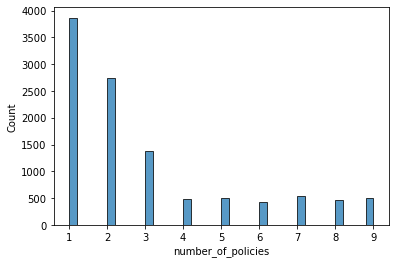

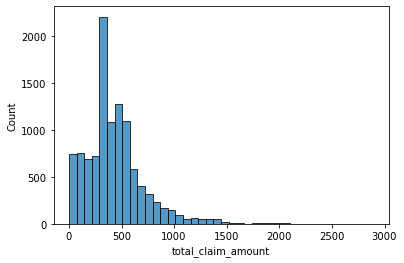

In [29]:
for i in range(numerical.shape[1]):
    sns.histplot(numerical[numerical.columns[i]], bins=40)
    plt.show()

#### 4. Do the distributions for different numerical variables look like a normal distribution

Not really. Maybe some.

#### 5. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

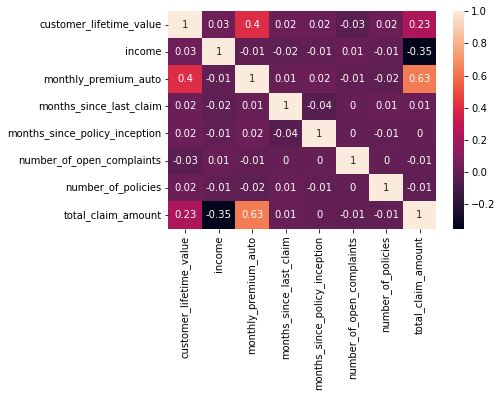

In [30]:
sns.heatmap(numerical.corr().round(2), annot = True)
plt.show()

## Lab | Customer Analysis Round 5

(Further processing...)

#### X-y split.

In [31]:
y = df['total_claim_amount']
x = df.drop(['total_claim_amount', 'customer', 'effective_to_date' ], axis = 1)



x.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,Arizona,5154.764074,No,Extended,High School or Below,Employed,M,82730,Urban,Married,127,13.0,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,California,5454.587929,No,Basic,Master,Employed,M,66334,Suburban,Single,69,25.0,25,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,California,5326.677654,No,Basic,High School or Below,Employed,F,76717,Urban,Married,66,26.0,10,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [32]:
x_num = df.select_dtypes(include = np.number)
x_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [33]:
transformer = MinMaxScaler().fit(x_num)
x_minmax = transformer.transform(x_num)
print(x_minmax.shape)

(10910, 8)


In [34]:
x_num_norm = pd.DataFrame(x_minmax, columns = x_num.columns)
x_num_norm.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,0.075162,0.375434,0.135848,0.432831,0.485777,0.076851,0.247399,0.150283
std,0.084555,0.303650,0.145327,0.288010,0.282229,0.182491,0.299920,0.100991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025992,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.093664
50%,0.047566,0.338199,0.092827,0.400000,0.484848,0.000000,0.125000,0.132197
75%,0.087130,0.622626,0.202532,0.657143,0.717172,0.000000,0.375000,0.189103
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Lab | Customer Analysis Round 6

#### One Hot/Label Encoding (categorical).

In [35]:
from sklearn.preprocessing import OneHotEncoder


In [36]:
x_cat = x.select_dtypes(include = 'object')
#maybe i should delete the effective-to-date column
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(x_cat)
encoded = encoder.transform(x_cat).toarray()

cat_encoded = pd.DataFrame(encoded)
cat_encoded.columns = encoder.get_feature_names() #willgive the columns names

cat_encoded.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_M,x6_Suburban,x6_Urban,x7_Married,x7_Single,x8_Personal Auto,x8_Special Auto,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer2,x10_Offer3,x10_Offer4,x11_Branch,x11_Call Center,x11_Web,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Medsize,x13_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Concat DataFrames

In [37]:
x_num_cat_encoded = np.concatenate([x_num, cat_encoded], axis = 1)
x_num_cat_encoded.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10910 and the array at index 1 has size 4543

In [ ]:
y

In [ ]:
x

### Linear Regression
#### Train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_num_cat_encoded,y, test_size=0.3, random_state=42)

#### Apply linear regression.

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(x_num_cat_encoded,y) 
predictions = lm.predict(x_num_cat_encoded) 
r2_score(y, predictions)

In [ ]:
x

### Model Validation
#### Description:
#### R2.

In [ ]:
r2 = r2_score(y_test, predictions)

#### MSE

In [ ]:
MSE = mean_squared_error(y_test, predictions)

#### RMSE

In [ ]:
RMSE = mean_squared_error(y_test, predictions, squared=False)

#### MAE

In [ ]:
MAE = mean_absolute_error(y_test, predictions)